<a href="https://colab.research.google.com/github/Shubhamkumar-op/Dog-vs-Cat-Classification/blob/main/Dog_vs_Cat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dogs-vs-cats

 99% 807M/812M [00:04<00:00, 187MB/s]
100% 812M/812M [00:04<00:00, 194MB/s]


In [4]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
import os

path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow 

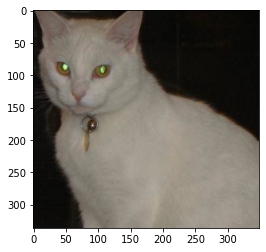

In [8]:
img = mpimg.imread('/content/train/cat.10023.jpg')
imgplt = plt.imshow(img)
plt.show()

In [9]:
file_names = os.listdir('/content/train/')

d = 0
c = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    d += 1

  else:
    c += 1

print('Number of dog images =', d)
print('Number of cat images =', c)

Number of dog images = 12500
Number of cat images = 12500


In [10]:
os.mkdir('/content/image resized')

In [11]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

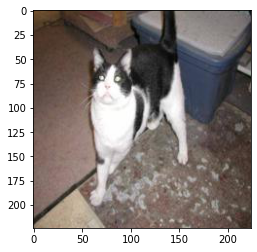

In [12]:
img = mpimg.imread('/content/image resized/cat.1031.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats

Cat --> 0

Dog --> 1

In [13]:
 filenames = os.listdir('/content/image resized')
 
 labels = []
 for i in range (2000):
   file_name = filenames[i]
   label = file_name[0:3]

   if label == 'dog':
     labels.append(1)

   else:
    labels.append(0)
 

In [14]:
filenames[0:10]

['cat.2714.jpg',
 'cat.3765.jpg',
 'cat.11306.jpg',
 'dog.3653.jpg',
 'dog.1258.jpg',
 'dog.7940.jpg',
 'cat.7316.jpg',
 'dog.10913.jpg',
 'dog.2561.jpg',
 'dog.2952.jpg']

In [15]:
labels[0:10]

[0, 0, 0, 1, 1, 1, 0, 1, 1, 1]

In [16]:
import cv2
import glob

In [17]:
image_directory = '/content/image resized/'
image_extension = ['png','jpg']
files = []

[files.extend(glob.glob(image_directory + '*'+e)) for e in image_extension]
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [18]:
X = dog_cat_images
y = np.asarray(labels)

In [19]:
X,y

(array([[[[ 80,  89,  99],
          [ 81,  90, 100],
          [ 85,  91, 102],
          ...,
          [115, 122, 131],
          [117, 119, 129],
          [117, 119, 129]],
 
         [[ 80,  89,  99],
          [ 81,  90, 100],
          [ 85,  91, 102],
          ...,
          [114, 121, 130],
          [116, 121, 130],
          [117, 122, 131]],
 
         [[ 80,  89,  99],
          [ 81,  90, 100],
          [ 85,  91, 102],
          ...,
          [108, 117, 126],
          [109, 118, 127],
          [113, 120, 129]],
 
         ...,
 
         [[ 18,  17,  19],
          [ 16,  15,  17],
          [ 13,  12,  14],
          ...,
          [ 44,  58,  77],
          [ 49,  60,  80],
          [ 51,  62,  82]],
 
         [[ 23,  22,  24],
          [ 23,  22,  24],
          [ 23,  22,  24],
          ...,
          [ 43,  57,  76],
          [ 48,  59,  79],
          [ 50,  61,  81]],
 
         [[ 28,  27,  29],
          [ 30,  29,  31],
          [ 34,  33,  35],
   

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [22]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [23]:
import tensorflow as tf
import tensorflow_hub as hub

In [24]:
mobilenet_model = 'https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/5'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [25]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 2)                 2004      
                                                                 
Total params: 3,542,269
Trainable params: 2,004
Non-trainable params: 3,540,265
_________________________________________________________________


In [26]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [27]:
history = model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 16s 40ms/step - loss: 0.1786 - accuracy: 0.9287
Epoch 2/5
50/50 [==============================] - 2s 40ms/step - loss: 0.0474 - accuracy: 0.9812
Epoch 3/5
50/50 [==============================] - 2s 40ms/step - loss: 0.0299 - accuracy: 0.9900
Epoch 4/5
50/50 [==============================] - 2s 40ms/step - loss: 0.0215 - accuracy: 0.9950
Epoch 5/5
50/50 [==============================] - 2s 45ms/step - loss: 0.0157 - accuracy: 0.9975


In [28]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  # val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  # val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # #plot loss
  # plt.plot(epochs,loss,label="training_loss")
  # plt.plot(epochs,val_loss,label="val_loss")
  # plt.title("loss")
  # plt.xlabel("epochs")
  # plt.legend()

  # #plot accuracy
  # plt.figure()
  # plt.plot(epochs,accuracy,label="training_accuracy")
  # plt.plot(epochs,val_accuracy,label="val_accuracy")
  # plt.title("accuracy")
  # plt.xlabel("epochs")
  # plt.legend()

  #plot accuracy vs loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,accuracy,label="val_accuracy")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

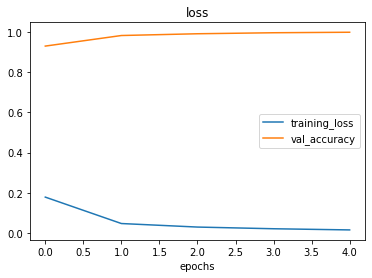

In [29]:
plot_loss_curves(history)

In [30]:
model.evaluate(X_test_scaled,y_test)

13/13 [==============================] - 2s 69ms/step - loss: 0.0998 - accuracy: 0.9700


[0.09982296079397202, 0.9700000286102295]

In [31]:

def image_path_to_predict():
  input_image_path = input('Path of the image to be predicted: ')

  input_image = cv2.imread(input_image_path)

  cv2_imshow(input_image)

  input_image_resize = cv2.resize(input_image, (224,224))

  input_image_scaled = input_image_resize/255

  image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

  input_prediction = model.predict(image_reshaped)

  print(input_prediction)

  input_pred_label = np.argmax(input_prediction)

  print(input_pred_label)

  if input_pred_label == 0:
    print('The image represents a Cat')

  else:
    print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpeg


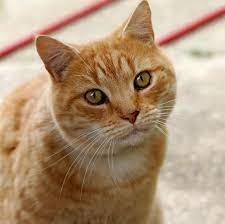

1/1 [==============================] - 1s 841ms/step
[[ 4.3915052 -6.763314 ]]
0
The image represents a Cat


In [32]:
image_path_to_predict()

Path of the image to be predicted: /content/cat2.jpeg


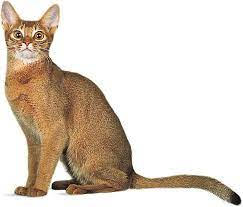

1/1 [==============================] - 0s 26ms/step
[[ 4.4244447 -9.034512 ]]
0
The image represents a Cat


In [33]:
image_path_to_predict()

Path of the image to be predicted: /content/dog2.jpeg


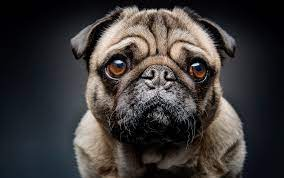

1/1 [==============================] - 0s 73ms/step
[[-0.73713046 -0.45046386]]
1
The image represents a Dog


In [34]:
image_path_to_predict()

Path of the image to be predicted: /content/dog.jpeg


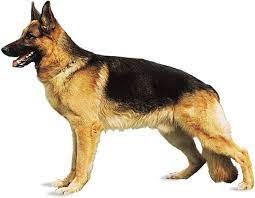

1/1 [==============================] - 0s 25ms/step
[[-0.05759833  0.8334436 ]]
1
The image represents a Dog


In [35]:
image_path_to_predict()